In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('sec_buildings.xlsx')
data.head()

,block,type,size,region,height,direction,price,built_date,price_unit
0,梅园六街坊,2室0厅,47.72,浦东,低区/6层,朝南,500,1992年建,104777
1,碧云新天地（一期）,3室2厅,108.93,浦东,低区/6层,朝南,735,2002年建,67474
2,博山小区,1室1厅,43.79,浦东,中区/6层,朝南,260,1988年建,59374
3,金桥新村四街坊（博兴路986弄）,1室1厅,41.66,浦东,中区/6层,朝南北,280,1997年建,67210
4,博山小区,1室0厅,39.77,浦东,高区/6层,朝南,235,1987年建,59089


In [2]:
data.describe()

,size,price,price_unit
count,20275.000000,20275.000000,20275.000000
mean,88.520194,500.297608,57454.495142
std,54.136902,367.247485,18401.347552
min,21.110000,50.000000,8996.000000
25%,56.015000,305.000000,44904.500000
50%,79.070000,400.000000,56478.000000
75%,103.810000,595.000000,67718.500000
max,1832.580000,8500.000000,199325.000000


In [3]:
s = pd.Series(data['built_date'])
a = s.str.slice(0,4)
age = []
for value in a:
    age.append(2022-int(value)+1)
data.loc[:,'built_age']=age
data.head()

,block,type,size,region,height,direction,price,built_date,price_unit,built_age
0,梅园六街坊,2室0厅,47.72,浦东,低区/6层,朝南,500,1992年建,104777,31
1,碧云新天地（一期）,3室2厅,108.93,浦东,低区/6层,朝南,735,2002年建,67474,21
2,博山小区,1室1厅,43.79,浦东,中区/6层,朝南,260,1988年建,59374,35
3,金桥新村四街坊（博兴路986弄）,1室1厅,41.66,浦东,中区/6层,朝南北,280,1997年建,67210,26
4,博山小区,1室0厅,39.77,浦东,高区/6层,朝南,235,1987年建,59089,36


<AxesSubplot:xlabel='region', ylabel='price_unit'>

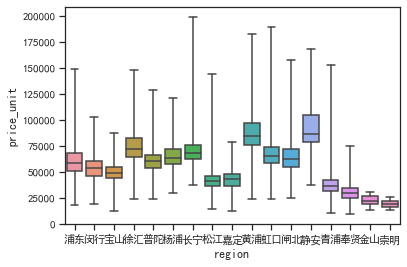

In [4]:
from matplotlib.style import context
rc={'font.sans-serif':'SimHei','axes.unicode_minus':False}
sns.set(context = 'notebook',style = 'ticks',rc = rc)
sns.boxplot(x='region',y='price_unit',data=data,whis=20)#似乎部分地区确实存在异常值，但由于二手房市场的不确定因素（地段、环境），这些也可能是正常的

In [5]:
data1 = data[data.region=='徐汇']
data2 = data[data.region=='闵行']
print('the mean unit price and age of Xuhui is respectively')
print(data1['price_unit'].mean(),data1['built_age'].mean())
print('the mean unit price and age of Minhang is respectively')
print(data2['price_unit'].mean(),data2['built_age'].mean())
print('the standard deviation unit price and age of Xuhui is respectively')
print(data1['price_unit'].std(),data1['built_age'].std())
print('the standard deviation unit price and age of Minhang is respectively')
print(data2['price_unit'].std(),data2['built_age'].std())
print('the skewness unit price and age of Xuhui is respectively')
print(data1['price_unit'].skew(),data1['built_age'].skew())
print('the skewness unit price and age of Minhang is respectively')
print(data2['price_unit'].skew(),data2['built_age'].skew())

the mean unit price and age of Xuhui is respectively
75758.45863052782 31.295292439372325
the mean unit price and age of Minhang is respectively
53667.534058385805 23.10360618202633
the standard deviation unit price and age of Xuhui is respectively
16920.68167593649 10.31266204830523
the standard deviation unit price and age of Minhang is respectively
11324.658422152132 6.4843739958026605
the skewness unit price and age of Xuhui is respectively
1.1493688959853803 1.6162058667875243
the skewness unit price and age of Minhang is respectively
0.4276078031005278 0.7093842868952176


In [6]:
cov = stats.pearsonr(data.iloc[0:,8],data.iloc[0:,9])[1]
print('the correlation coefficient between the age and the unit price of the houses is')
print(cov)
print('which means it has no significant correlation')

the correlation coefficient between the age and the unit price of the houses is
5.419296560379866e-254
which means it has no significant correlation


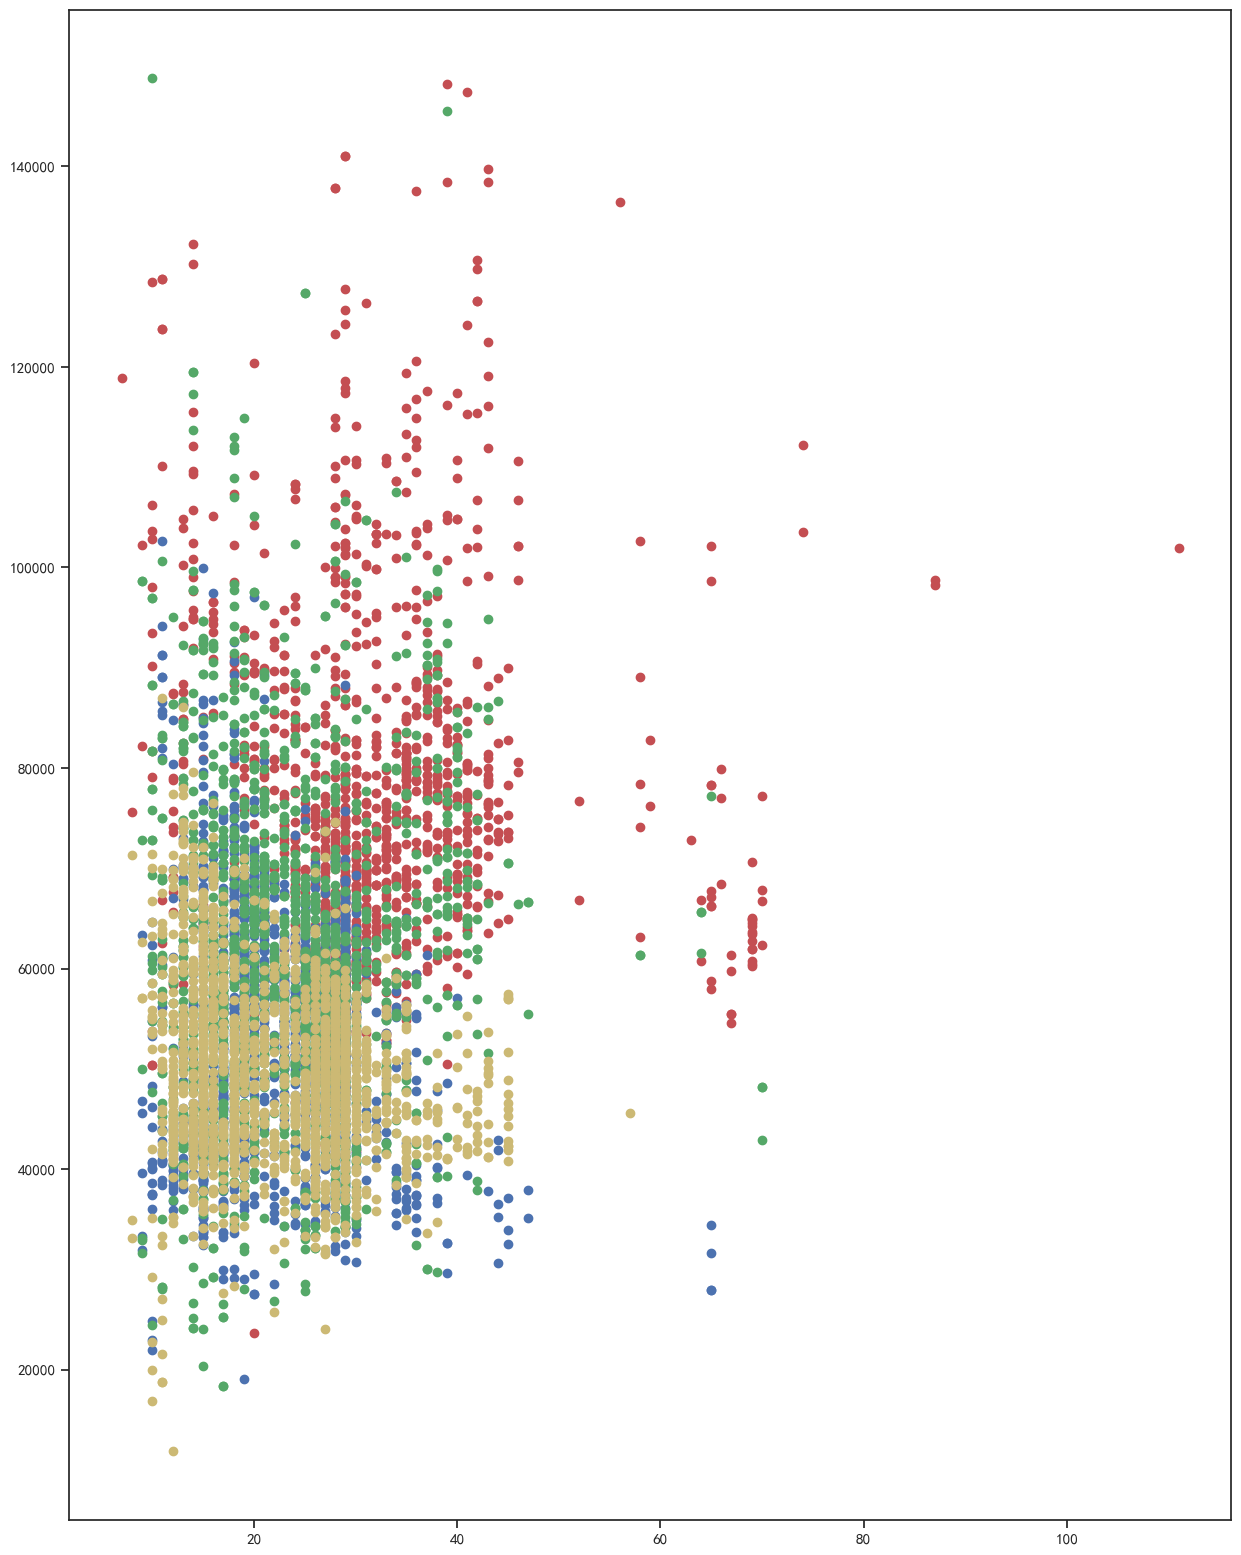

In [7]:
data3 = data[data.region=='浦东']
data4 = data[data.region=='宝山']
plt.figure(figsize=(15,20),dpi=100)
plt.scatter(data1['built_age'],data1['price_unit'], c='r', label = '徐汇')
plt.scatter(data2['built_age'],data2['price_unit'], c='b', label = '闵行')
plt.scatter(data3['built_age'],data3['price_unit'], c='g', label = '浦东')
plt.scatter(data4['built_age'],data4['price_unit'], c='y', label = '宝山')